# PART 1 - Analysis of COMPAS dataset

#### Group Members : 
                Marck-Edward KEMEH - marck-edward.kemeh@grenoble-inp.org
                Irman FAQRIZAL - irman.faqrizal@univ-grenoble-alpes.fr

In [1]:
# Increase my page width
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Imports
import urllib
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from pylab import rcParams
from sklearn import feature_extraction
from sklearn import preprocessing
from random import seed, shuffle

<h1>1. Dataset exploration</h1>
In this part we will explore the ProPublica COMPAS dataset by determining the features available for exploration, labels. we also want to analyse performance metrics relating to various race available in the dataset and gender. 
The main goal of this section is to determine and understand the features needed to build a classifier.

<h3>1. 1 ProPublica COMPAS dataset</h3>
we begin by either downloading or loading the dataset, and explring its content.

In [2]:
#function to plot some graphs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42

#downloading or checking for data
SEED = 1234
seed(SEED)
np.random.seed(SEED)

def check_data_file(fname):
    files = os.listdir(".") # get the current directory listing
    print("Looking for file '%s' in the current directory...",fname)

    if fname not in files:
        print("'%s' not found! Downloading from GitHub...",fname)
        addr = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
        response = urllib.request.urlopen(addr)
        data = response.read()
        fileOut = open(fname, "wb")
        fileOut.write(data)
        fileOut.close()
        print("'%s' download and saved locally..",fname)
    else:
        print("File found in current directory..")
    
COMPAS_INPUT_FILE = "compas-scores-two-years.csv"
check_data_file(COMPAS_INPUT_FILE)

pd.options.display.max_columns = None
df=pd.read_csv('compas-scores-two-years.csv')
df

Looking for file '%s' in the current directory... compas-scores-two-years.csv
File found in current directory..


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,0,2,0,0,3,-1.0,2014-03-08 08:06:02,2014-03-09 12:18:04,140033

From the display of the datset above, we have 53 columns and 7214 rows.
Not all columns will be needed to analyse the data so we have to filter un-needed columns.to deide, we can display colummns having empty values to determine if they will have much much impact on the exploration or not.

In [3]:
#sum of null values per column
df.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

We can see from the data above, some columns such as r_case, r_charge_degree have a huge amount of empty values. We can't use these part of the data to build our classifier or do any analysis as it will be biased. Columns such as id and name will also not be needed to do our analysis because we will not need the name of the person to see how our classifier will perform in the next part.

<h3>1.2 Filtered Dataset</h3>
 We will first remove all columns which contain null (NaN) values, followed by listing each column with how many unique values they have.

In [4]:
df = df[df.columns[~df.isnull().any()]]
df.nunique()

id                       7214
name                     7158
first                    2800
last                     3950
compas_screening_date     690
sex                         2
dob                      5452
age                        65
age_cat                     3
race                        6
juv_fel_count              11
decile_score               10
juv_misd_count             10
juv_other_count            10
priors_count               37
c_charge_degree             2
is_recid                    2
is_violent_recid            2
type_of_assessment          1
decile_score.1             10
score_text                  3
screening_date            690
v_type_of_assessment        1
v_decile_score             10
v_score_text                3
v_screening_date          690
priors_count.1             37
start                     237
end                      1115
event                       2
two_year_recid              2
dtype: int64

By observing our result, some columns have large number of unique values. 
These may indicate that they are not relevant, which means we can drop them. We can also see there are some columns which only have 1 unique value, we will not use these data because we cant use to compare with our variables.

now, we select the needed columns for exploration of the dataset. this totals up to 15 columns

In [5]:
df = df[['sex','age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'is_recid', 
         'is_violent_recid', 'decile_score', 'score_text', 'v_decile_score', 'v_score_text', 'event', 'two_year_recid']]
df.head()

,sex,age_cat,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,is_recid,is_violent_recid,decile_score,score_text,v_decile_score,v_score_text,event,two_year_recid
0,Male,Greater than 45,Other,0,0,0,F,0,0,1,Low,1,Low,0,0
1,Male,25 - 45,African-American,0,0,0,F,1,1,3,Low,1,Low,1,1
2,Male,Less than 25,African-American,0,0,4,F,1,0,4,Low,3,Low,0,1
3,Male,Less than 25,African-American,0,1,1,F,0,0,8,High,6,Medium,0,0
4,Male,25 - 45,Other,0,0,2,F,0,0,1,Low,1,Low,0,0


### Race

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

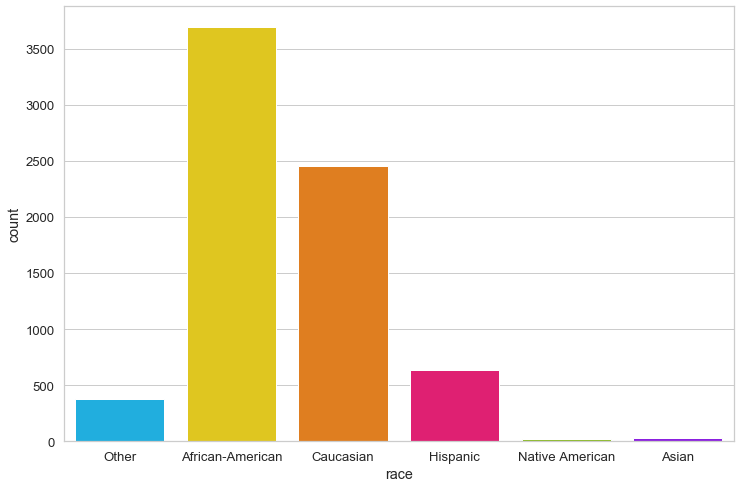

In [6]:
sns.countplot(df.race)
df.race.value_counts()

As shown above this variety of races may has an effect on the result of classifier since race 'African-American' number almost as the same other races combined. To analyze further, we will present histograms of 'decile_score' for each race.

### Prior Counts
below we analysis the number of people having some prior counts of crimes.

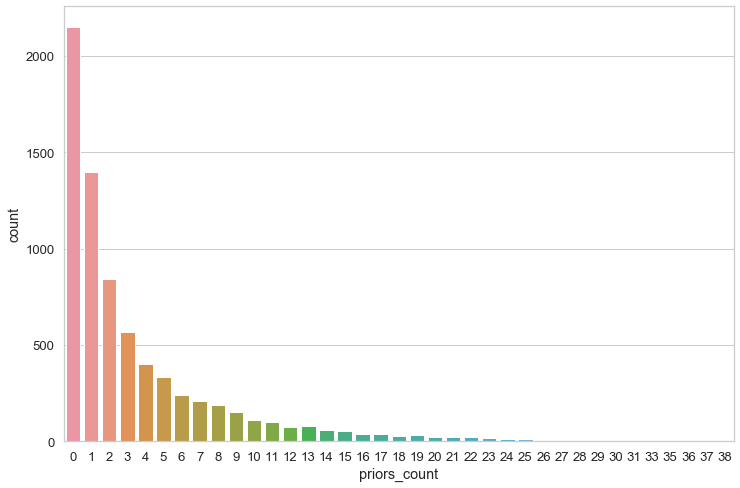

In [7]:
sns.countplot(df.priors_count)

prior_count shows how many times a number of people offended. We can take into consideration this column to access the risk of recidivism of an individual.

### Two_year Recid
we also analyse this section by race, age categoris and by gender to see the distribution.
This dataset includes information about whether or not the subject recidivated, and so we can directly test the accuracy of the predictions. First, we visualize the recidivsm rates across race, sex and age categories.

In [8]:
df.two_year_recid.value_counts()

0    3963
1    3251
Name: two_year_recid, dtype: int64

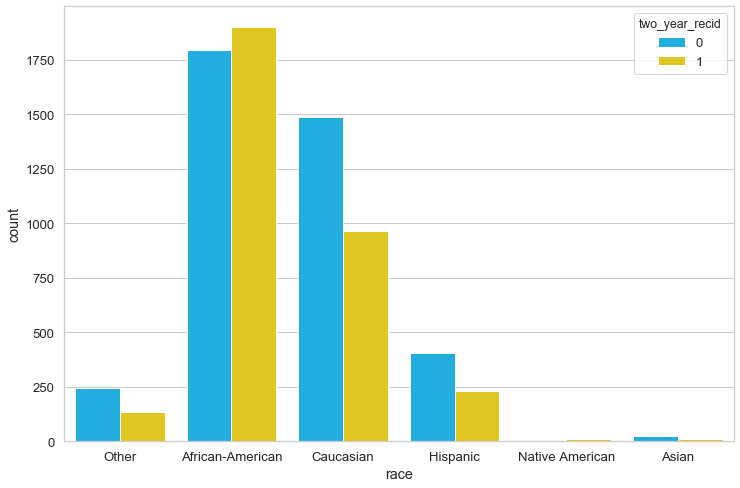

In [9]:
by_race = sns.countplot(x="race", hue="two_year_recid", data=df[df.race.isin(['Caucasian','Asian','African-American', 'Hispanic','Native American', 'Other'])])

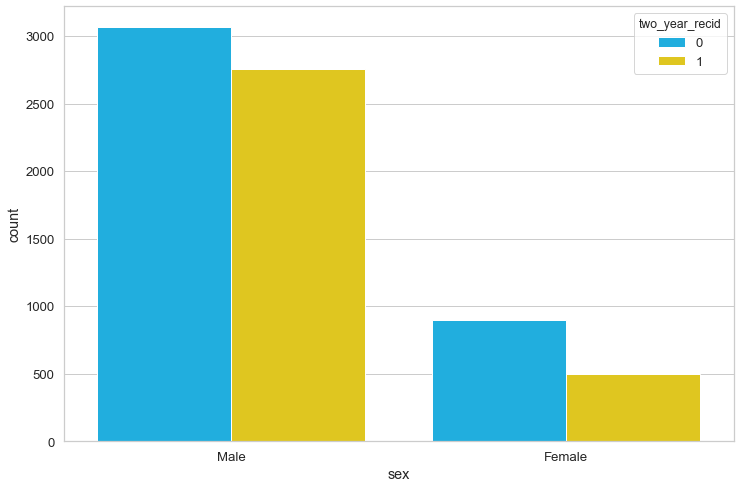

In [10]:
by_sex = sns.countplot(x="sex", hue="two_year_recid", data=df)


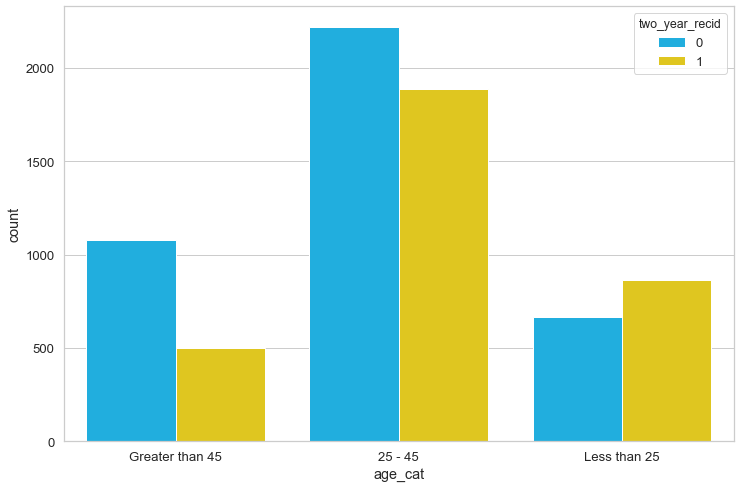

In [11]:
by_age = sns.countplot(x="age_cat", hue="two_year_recid", data=df)

We can see from from graphs above on the ground truth

### Score_text
this is used to classify people into high, medium or Low category. Theses indicate how dangerous a particular person is. From compas, some people from a particular race with labelled with a high score_text while their offense was a minor one. Others were labelled as low or medium from a particular race even though their crime was one to be labelled high. Because of this label, the compass algorithm wrongly predict redicivsm for a certain race (blacks). we would want to see the  distribution of people according to race in these score text.

Low       3897
Medium    1914
High      1403
Name: score_text, dtype: int64

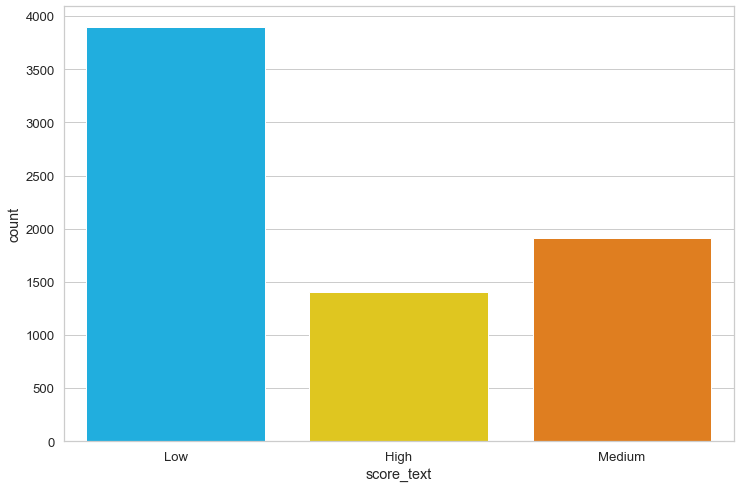

In [12]:
# number of people in each risk labels
sns.countplot(df.score_text)
df.score_text.value_counts()

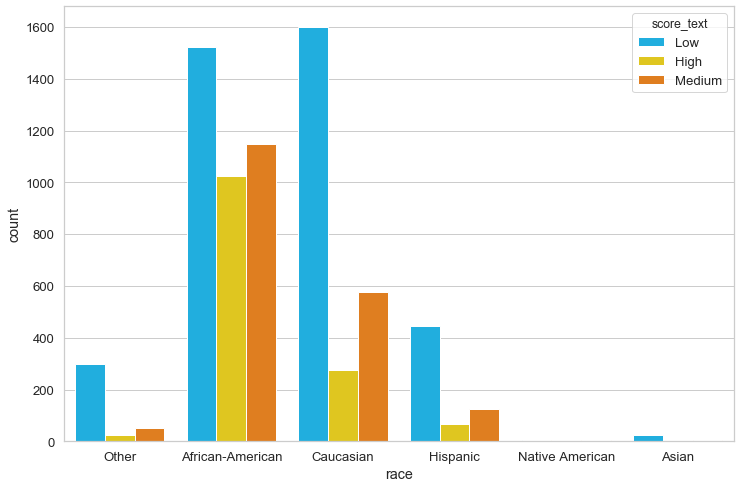

In [13]:
by_race = sns.countplot(x="race", hue="score_text", data=df[df.race.isin(['Caucasian','Asian','African-American', 'Hispanic','Native American', 'Other'])])

In the bar charts above, we see a large difference in how these scores are distributed by race, with a majority of Asians and Native-americans, others predicted as low risk (score = 0) and a majority of black people predicted high(score = 3) and medium risk (score = 2). Caucasians also have a majority predictes as high

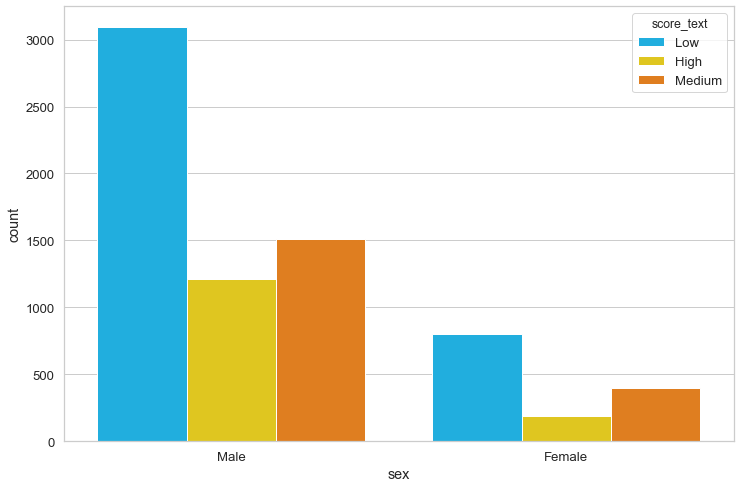

In [14]:
by_sex = sns.countplot(x="sex", hue="score_text", data=df)

we can see from above that there is ahuge disparity between the genders. More of the males were classified as high risk as compared to females.this might be as a result of the variation in count between the genders but the distribution is not fair. This means a male offender is likely to be classified as high as compared to a female for the same crime.

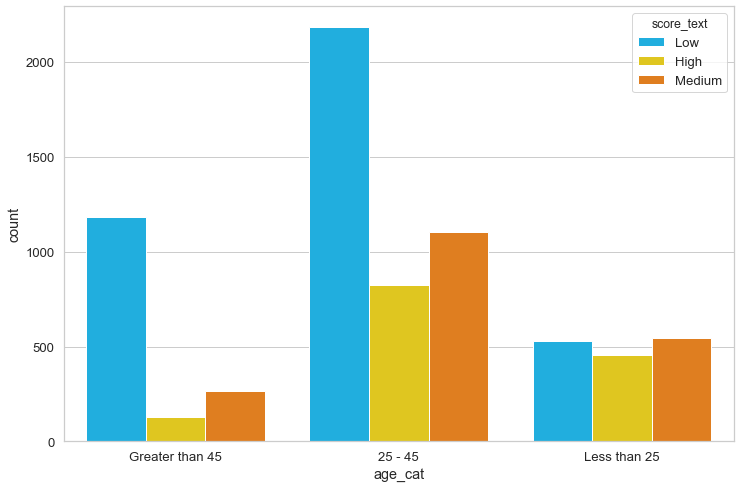

In [15]:
by_age = sns.countplot(x="age_cat", hue="score_text", data=df)

from above we can see majority of the age group falls between 25-45 predicted as low. Less than 25 offenders are likely to be placed into any label as they have almost the same distribution.

Without considering the prior count on the graphs above, we can see Caucasian, Hispanic, Asian and other have almost a similar ditribution, Native Americans have the same ditributions accross this labels and African-Americans have a higher distribution. It should be noted that the number of people (labelled as frequency in the graph) is not the same accross the races. African-Americans have the highest number of people in this dataset.

judges are always presented with 2 labels (one that classifies people into High, Medium and Low risk, and a corresponding decile score). 

### Decile_Scores (Risk scores)
the decile score ranges from 1 to 10 with 1 being the least probability to recidiviate and 10 being the highest.
below is a distribution of the decile scores according to the race categories


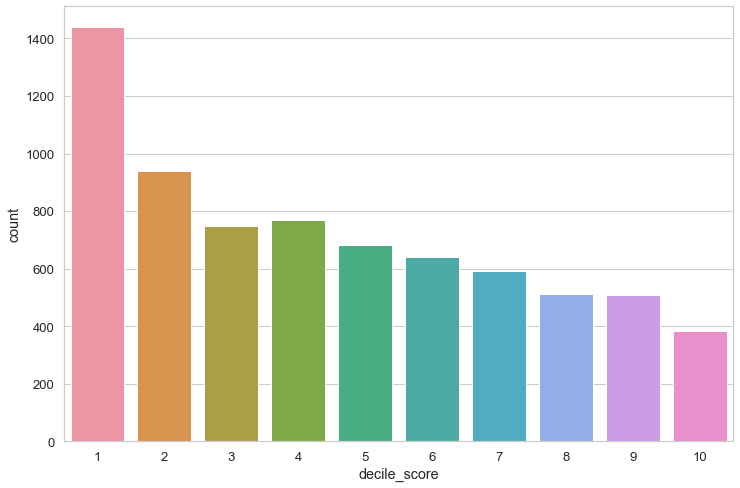

In [16]:
sns.countplot(df.decile_score)

The graph above shows the distribution of the number of people distibuted accorss the decile scores. This does not give a detailed information so we ould continue to analyse by race.

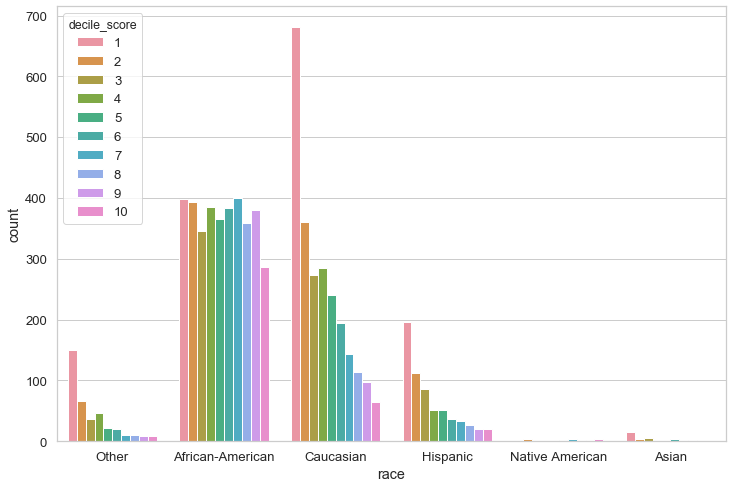

In [17]:
by_race = sns.countplot(x="race", hue="decile_score", data=df[df.race.isin(['Caucasian','Asian','African-American', 'Hispanic','Native American', 'Other'])])

'African-American' decile scores are almost evenly distributed. This means there is a higher chances of being classified as '8' or '10' for a crime deserving an '1'. if we look closely scor of '0' and '7' is almost equal in african americans. this mentions a possibility as being mislabelled for a crime.

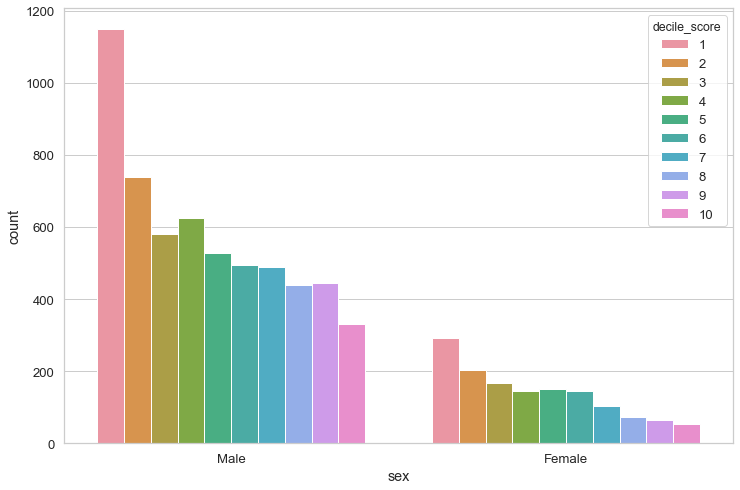

In [18]:
by_sex = sns.countplot(x="sex", hue="decile_score", data=df)

Also by gender, males are likely to be given a higher score than females. In males the decile scores are almost equal in 6 and 7, also in 8 and 9. Another possibility of being misclassified or mislabelled for crimes. For females, The score seems to be even from 3 to 6.

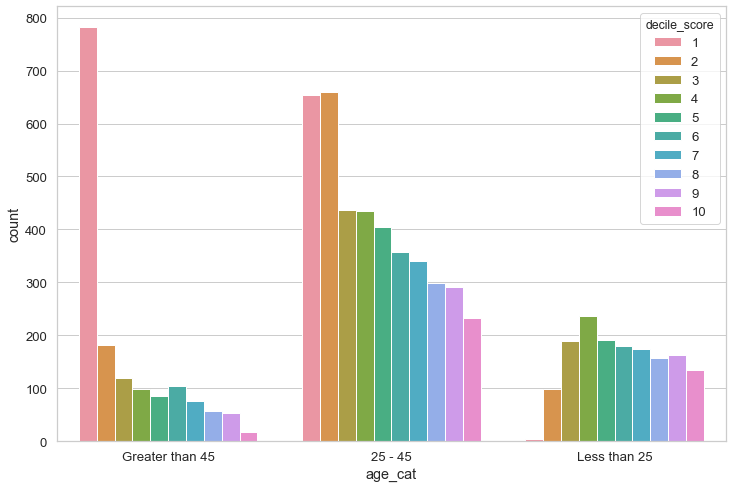

In [19]:
by_age = sns.countplot(x="age_cat", hue="decile_score", data=df)

majority of the decile score was attributed to age category of 25-45. Less than age of 25, it is hi to be classified as a 2,4,5,6,7,8 or 9 because the range seems to be almost equal. Majority of greater than 45 were classified as a 1 with few classified as a 10. this shows a bias against the age category of 25-45 and less than 25.

<!-- from the charts above, we can see that our training model predict almost same as the original Propublica predictions. Only African-American is slightly different but not large enough to draw a conclusion of fairness.
all charts except african americans shows they are a bit violent as compared to the initial graph using just decile scores. the graph for African-american shows the reduction in violence as compared to using just decile scores as in the first part of the project. The most intersting change here is Native American whose chart id very different on violence basis.

We can say this is a bit fair as the original compass classifier but wwe would like to do some predictions to conclude on fairness. With African American, it didnt predict that all risk ranges ahve a higher rate of recidivism as predicted by compass. In Native Americans, It aso showed a class of people with a higher rate of recidivism. -->

### Compass Classifier and Performance Metrics
We will compute basic performance metrics of the COMPAS predictions in this section. As mentioned in the document, the main issue of this predictions is biased towards certain racial group.

According to COMPAS 'two_year_recid' is the ground truth whether the criminals actually recidivated or not. Therefore we can use this data to compute the accuracy of COMPAS prediction by considering value of 'score_text'. To simplify we will consider if the value of 'score_text' is 'High', it means that the classifer tells that the corresponding criminal will redivicate.<br><br>

Practically, we will first need to convert the column 'score_text' into 0 and 1 values. Then we will compute the accuracy, also other metrics such as Precision and Recall would be evaluated.

Accuracy	: 0.6537288605489326
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      3897
           1       0.63      0.61      0.62      3317

    accuracy                           0.65      7214
   macro avg       0.65      0.65      0.65      7214
weighted avg       0.65      0.65      0.65      7214



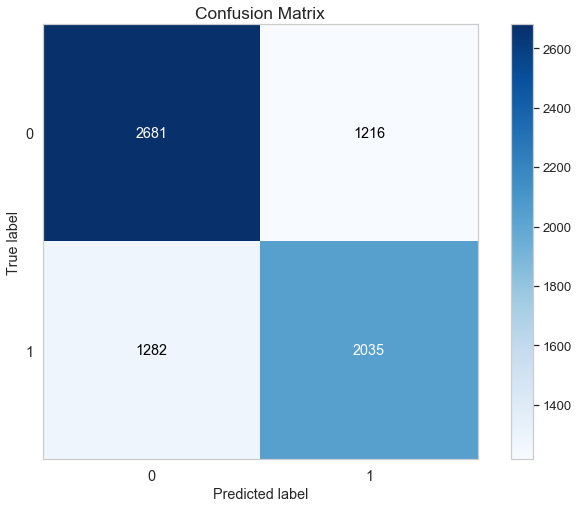

In [20]:
nparray = pd.DataFrame(df['score_text']).to_numpy()
nparray1 = pd.DataFrame(df['two_year_recid']).to_numpy()
i = 0
for x in nparray:
    if x == "Low":
        nparray[i] = 0
    else:
        nparray[i] = 1
    i = i + 1

y_pred = nparray.astype('int')
y_true = nparray1.astype('int')
print("Accuracy\t: " + str(accuracy_score(y_true, y_pred)))
print(classification_report(y_pred,y_true))
skplt.metrics.plot_confusion_matrix(y_pred,y_true)

We can see that all of the performance metric values are pretty low. The crowd based accuracy is at 65% with no race condition attached. This means not all cases were correctly classified. Recall is 1.0 meaning that all relevant information were available/retrieved. Precision is also based at 0.65 meaning that not all relevant instances used for the classification are not available. f1_score is the effectiveness of data classification.  it is a combination of precision and recall, best value is 1.

From the confusion matrix, we can see a greater portion of the data was misclassified from the prediction. there is a higher number of False-Negative as compaed to True Positives.

This indicates that the Compass prediction is poor.The factors we mentioned above might be responsible for these misclassifications. Also we can see from the matrix that there is no True-Negative or False-Positive. This does not seem to be really correct.

To analyze further, we will compute the metrics for each race to see if the accuracy is evenly distributed.

In [21]:
tmpaccuracy = [0] * 6
tmpprecission = [0] * 6
tmprecall = [0] * 6
idx=0
races = df.race.unique()
for race in races:
    nparray = pd.DataFrame(df['score_text'].loc[df['race'] == race]).to_numpy()
    nparray1 = pd.DataFrame(df['two_year_recid'].loc[df['race'] == race]).to_numpy()
    i = 0
    for x in nparray:
        if x == "Low":
            nparray[i] = 0
        else:
            nparray[i] = 1
        i = i + 1
        
    y_pred = nparray.astype('int')
    y_true = nparray1.astype('int')
    print(race+" Offenders => ")
    print("Accuracy\t: " + str(accuracy_score(y_true, y_pred)))
    print("Precision\t: " + str(precision_score(y_true, y_pred)))
    print("Recall\t\t: " + str(recall_score(y_true, y_pred)) + "\n")
    tmpaccuracy[idx] = accuracy_score(y_true, y_pred)
    tmpprecission[idx] = precision_score(y_true, y_pred)
    tmprecall[idx] = recall_score(y_true, y_pred)
    idx = idx + 1

Other Offenders => 
Accuracy	: 0.6657824933687002
Precision	: 0.5443037974683544
Recall		: 0.3233082706766917

African-American Offenders => 
Accuracy	: 0.6382575757575758
Precision	: 0.6297148114075437
Recall		: 0.7201472908995266

Caucasian Offenders => 
Accuracy	: 0.6699266503667481
Precision	: 0.5913348946135831
Recall		: 0.5227743271221532

Hispanic Offenders => 
Accuracy	: 0.6609105180533752
Precision	: 0.5421052631578948
Recall		: 0.44396551724137934

Native American Offenders => 
Accuracy	: 0.7777777777777778
Precision	: 0.75
Recall		: 0.9

Asian Offenders => 
Accuracy	: 0.84375
Precision	: 0.75
Recall		: 0.6666666666666666



the performance metrics per race seems not to have a huge gap with respect to the general performance.

Participant accuracy is not significantly different for black defendants (63%) compared with other race defendants. Precision does not also improve. The scores obtained from above just itirates the fact that the predictions are not always correct and that compass most often misclassifies the criminals.

We can therefore not conclude that some columns including (race, decile scores, score_text) has a significant impact on overall accuracy or fairness. The exclusion of race does not necessarily lead to the elimination of racial disparities in human recidivism prediction.

we show below the graphs of the results obtained from performance evaluation. Each is represented by race.


We show below a representation of the results in graphs.

#### Accuracy graph
we plot below to represent accuracy, recall and precision by race

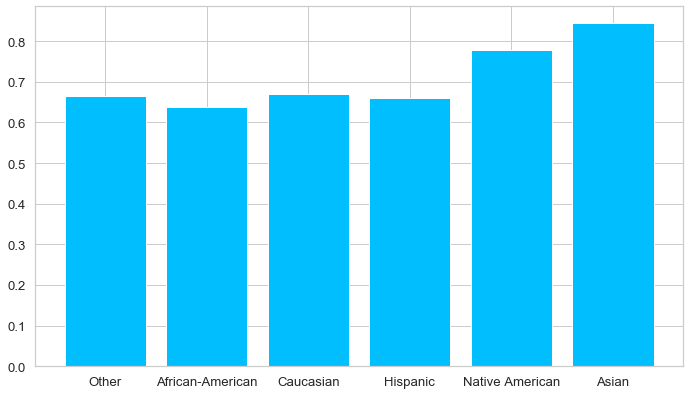

In [22]:
Race = df['race']
Race = Race.unique()
Accuracy = [tmpaccuracy[0], tmpaccuracy[1], tmpaccuracy[2], tmpaccuracy[3], tmpaccuracy[4], tmpaccuracy[5]]

fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_axes([0,0,1,1])
ax.bar(Race,Accuracy)
plt.show()

####  Precision & Recall Graph

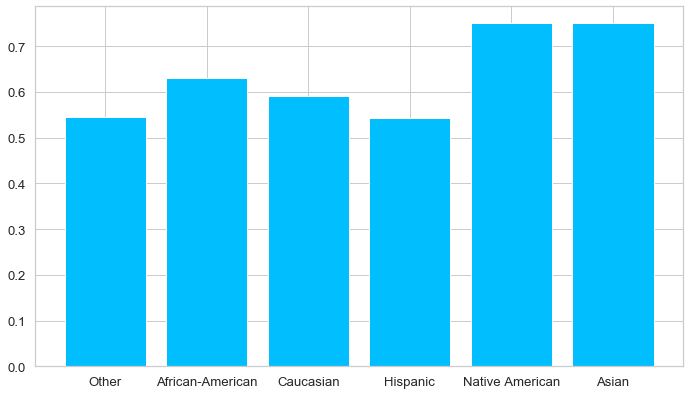

In [23]:
#Precision Graph
Precison = [tmpprecission[0], tmpprecission[1], tmpprecission[2], tmpprecission[3], tmpprecission[4], tmpprecission[5]]

fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_axes([0,0,1,1])
ax.bar(Race,Precison)
plt.show()

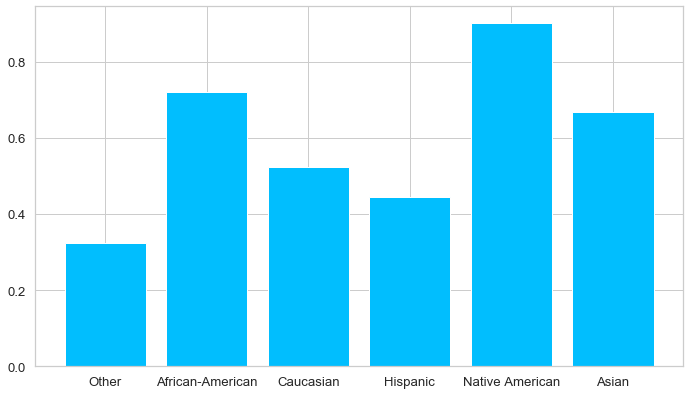

In [24]:
#Recall Graph
Recall = [tmprecall[0], tmprecall[1], tmprecall[2], tmprecall[3], tmprecall[4], tmprecall[5]]
fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_axes([0,0,1,1])
ax.bar(Race,Recall)
plt.show()


###  Bias on Race
On the chart below we can see a graph on the number of defendants by race where they labeled 'High' but didn't actually recid in two years. The next graph is showing the other way around, which is labeled 'Low' and 'two_year_recid' = 1.

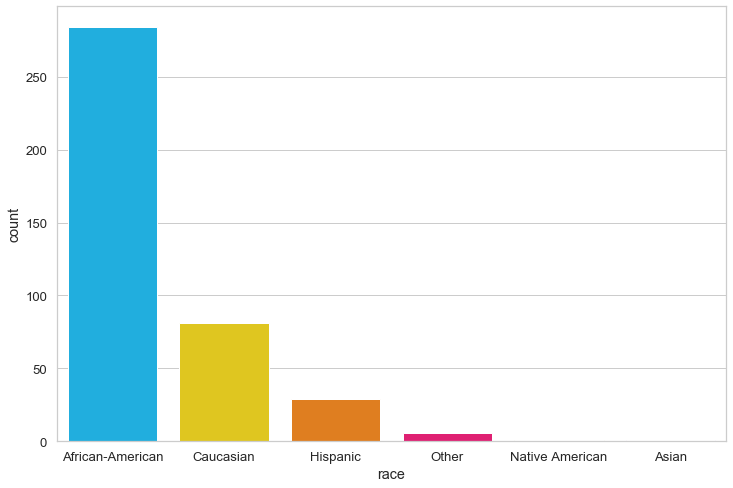

In [25]:
dfbias = df.loc[(df['two_year_recid']==0) & (df['score_text']=='High')]
sns.countplot(dfbias.race)

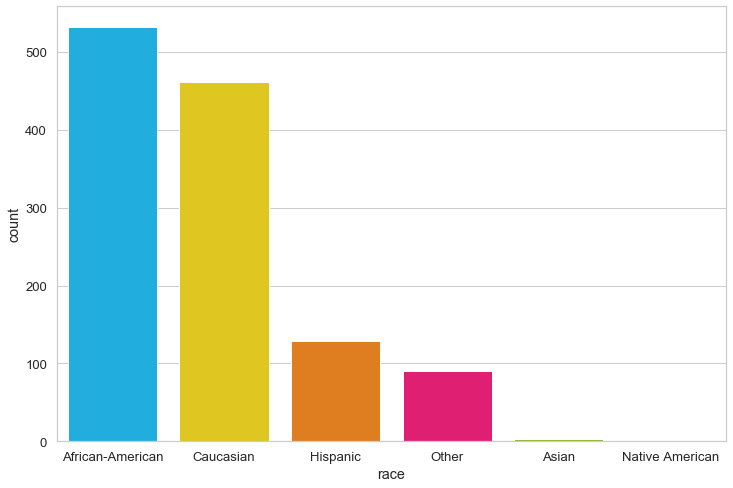

In [26]:
dfbias = df.loc[(df['two_year_recid']==1) & (df['score_text']=='Low')]
sns.countplot(dfbias.race)

From those two graph we can see that the most of the wrongly labeled defendants are 'African - American'. Other races which actually recided were labelled a low risk as compared to African-American.Also most of African-American who did not recid were labelled a high rish as compared to other races. This shows a bias in the race.

It is true that the proportion of 'African - American' defendant is much larger, however we can compute the percentage below. 

In [27]:
print("Bias for 'two_year_recid = 0' and score_text = 'High'")

total = len(df.loc[(df['race']=='African-American')])
zero_high = len(df.loc[(df['race']=='African-American') & (df['two_year_recid']==0) & (df['score_text']=='High')])
print("African-American\t = " + str(zero_high/total))

total = len(df.loc[(df['race']!='African-American')])
zero_high = len(df.loc[(df['race']!='African-American') & (df['two_year_recid']==0) & (df['score_text']=='High')])
print("Non African-American\t = " + str(zero_high/total))

print("\nBias for 'two_year_recid = 1' and score_text = 'Low'")

total = len(df.loc[(df['race']=='African-American')])
zero_high = len(df.loc[(df['race']=='African-American') & (df['two_year_recid']==1) & (df['score_text']=='Low')])
print("African-American\t = " + str(zero_high/total))

total = len(df.loc[(df['race']!='African-American')])
zero_high = len(df.loc[(df['race']!='African-American') & (df['two_year_recid']==1) & (df['score_text']=='Low')])
print("Non African-American\t = " + str(zero_high/total))

Bias for 'two_year_recid = 0' and score_text = 'High'
African-American	 = 0.07683982683982683
Non African-American	 = 0.033541785105173395

Bias for 'two_year_recid = 1' and score_text = 'Low'
African-American	 = 0.14393939393939395
Non African-American	 = 0.19442865264354747


As we can see from short computation above. There is definitely a bias towards 'African-American', since we have higher percentage compared to other races, when looking at the number of 'African-American' who labeled high but didn't recid. Also, lower percentage when they are actually recid but labeled 'Low'.